## Laboratorio Eletronica Industrial

### Alunos:
 1. Bruno Henrique
 2. Paula Duque Estrada Fernandes
 3. Victor Hugo de Avelar Rezende

### Professor: Luís Fernando Corrêa Monteiro

## Bibliotecas
    Bibliotecas utilizadas para auxiliar a execução dos codigos

In [2]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

# 1 - Cicuito RL

## 1.1 - Préambulo
    Variaveis criadas para determinando todos os valores de componentes prédeterminados

In [2]:
L = 0.0054 #Indutancia
R = 10 #Resistencia
n = 40000
Ts = 10**-6 #Tempo de amostragem
w = 2*m.pi * 60





## 1.2 - Funções
    Funções referentes as entradas e saidas do circuito

In [3]:
def Vs(k):
    Vs=20* m.sin(w*k*Ts)
    return Vs

def i(k):
    if k<=0:
        i=0
    else:
        if Vs(k)>0:
            i=(Ts/(L+R*Ts))*(Vs(k)+(L*val_i[k-1])/Ts)
        else:
            i=0
    return i

def Vl(k):
    if val_i[k]>0:
        Vl=(L/Ts)*(val_i[k]-val_i[k-1])
    else:
        Vl=0    
    return Vl

## 1.3 - Armazenando valores

In [7]:
val_Vs=[]
val_Vl=[]
val_i=[]
t=[]

for k in range(0,n):
    val_Vs.append(Vs(k))
    val_i.append(i(k))
    val_Vl.append(Vl(k))
    t.append(Ts*k)
    
df_RL=pd.DataFrame({'t - s':t,
                    'Tensão da Fonte - V':val_Vs,
                    'Tensão do Indutor - V':val_Vl,
                    'Corrente - mA':val_i
                   })

In [8]:
display(df_RL)

,t - s,Tensão da Fonte - V,Tensão do Indutor - V,Corrente - mA
0,0.000000,0.000000,0.000000,0.000000
1,0.000001,0.007540,0.007526,0.000001
2,0.000002,0.015080,0.015038,0.000004
3,0.000003,0.022619,0.022536,0.000008
4,0.000004,0.030159,0.030020,0.000014
...,...,...,...,...
39995,0.039995,11.786183,-2.688871,1.447505
39996,0.039996,11.780091,-2.689982,1.447007
39997,0.039997,11.773997,-2.691092,1.446509
39998,0.039998,11.767901,-2.692202,1.446010


## 1.4 - Graficos

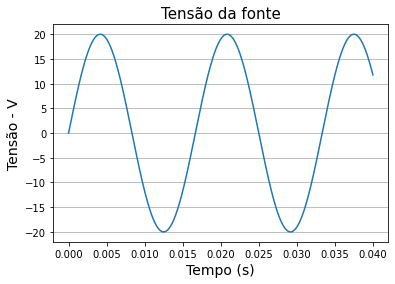

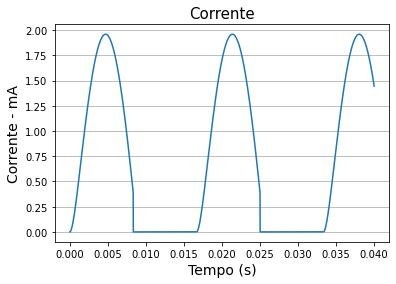

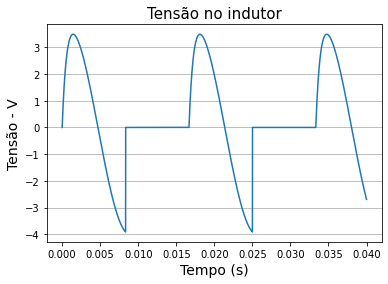

In [9]:

plt.title("Tensão da fonte",fontsize=15)
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_RL['t - s'],df_RL['Tensão da Fonte - V'])
plt.show()

plt.title("Corrente",fontsize=15)
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Corrente - mA", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_RL['t - s'],df_RL['Corrente - mA'])
plt.show()

plt.title("Tensão no indutor",fontsize=15)
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_RL['t - s'],df_RL['Tensão do Indutor - V'])
plt.show()

## 1.5 - Dados da Simulação

In [51]:
df_psim_RL = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Simulações\RL\Circuito 1.csv',
                          sep=',')

display(df_psim_RL)
df_psim_RL.dtypes

,Time,V1,V0,VL
0,0.000025,1.884928e-01,6.348595e-03,0.182144
1,0.000050,3.769688e-01,2.084526e-02,0.356124
2,0.000075,5.654113e-01,4.122285e-02,0.524188
3,0.000100,7.538037e-01,6.920405e-02,0.684600
4,0.000125,9.421290e-01,1.044422e-01,0.837687
...,...,...,...,...
3995,0.099900,-7.538037e-01,-7.538758e-07,0.000073
3996,0.099925,-5.654113e-01,-5.653135e-07,-0.000097
3997,0.099950,-3.769688e-01,-3.770494e-07,0.000081
3998,0.099975,-1.884928e-01,-1.884035e-07,-0.000089


Time    float64
V1      float64
V0      float64
VL      float64
dtype: object

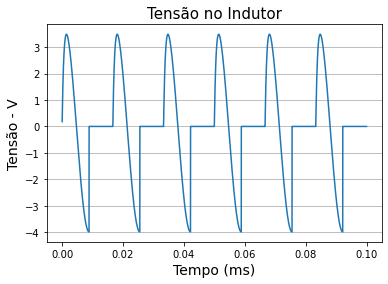

In [52]:
plt.title("Tensão no Indutor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_psim_RL["Time"],df_psim_RL["VL"])


plt.show()

## 1.6 - Dados do osciloscopio

In [130]:
df_dados_RL = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Dados Osciloscópio\scope_0.CSV',sep=',')
df_dados_RL.columns = df_dados_RL.loc[0]
df_dados_RL=df_dados_RL.drop(0,axis=0)


df_dados_RL["Volt"]=df_dados_RL["Volt"].astype('float')
df_dados_RL["second"]=df_dados_RL["second"].astype('float')
df_dados_RL["second"]=df_dados_RL["second"]+0.0421


df_dados_RL.dtypes
display(df_dados_RL)

,second,Volt
1,0.017100,2.572864
2,0.017125,2.814070
3,0.017150,2.894472
4,0.017175,2.974874
5,0.017200,3.055276
...,...,...
1996,0.066975,2.010050
1997,0.067000,2.170854
1998,0.067025,2.331658
1999,0.067050,2.412060


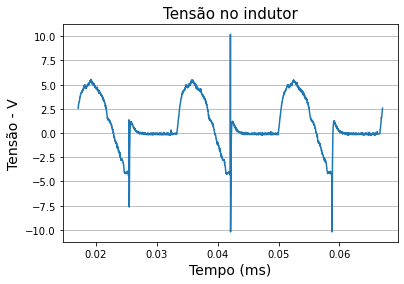

In [131]:
plt.title("Tensão no indutor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_dados_RL["second"],df_dados_RL["Volt"])
#plt.xlim(0,600)

plt.show()

## 1.7 - Comparação dos dados do osciloscopio com a simulação

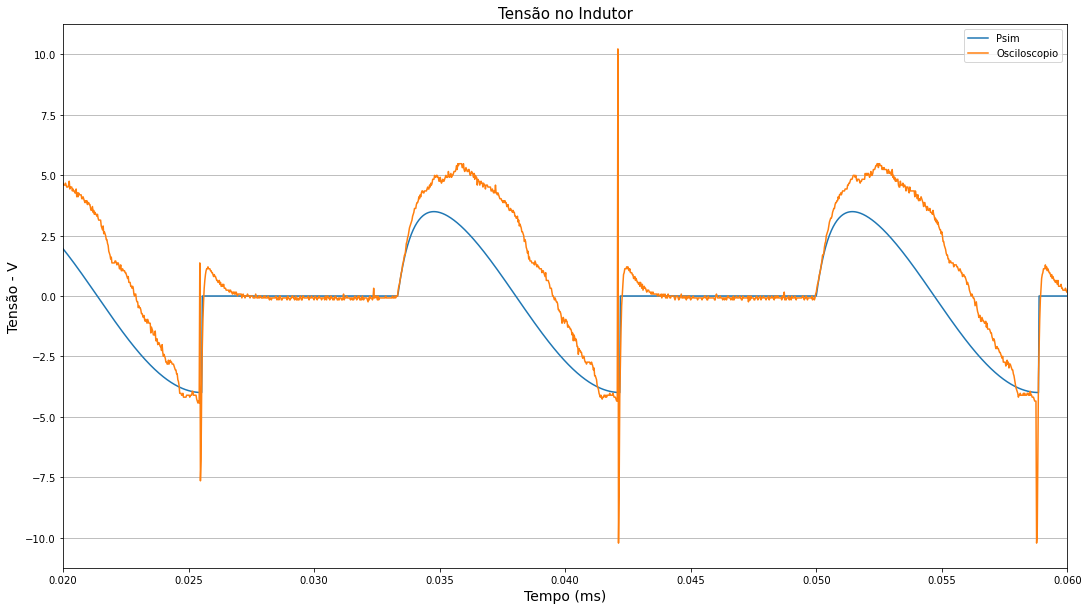

In [132]:
plt.figure(figsize=(18,10))

plt.title("Tensão no Indutor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.xlim(0.02,0.06)
plt.grid(axis = "y")
plt.plot(df_psim_RL["Time"],df_psim_RL["VL"],label="Psim")
plt.plot(df_dados_RL["second"],df_dados_RL["Volt"],label="Osciloscopio")
plt.legend()

plt.savefig('Circuito 1 - Grafico comparativo.png', format='png')

plt.show()

# 2 - Cicuito RC

## 2.1 - Préambulo
    Variaveis criadas para determinando todos os valores de componentes prédeterminados

In [14]:
C = 470*10**(-6) #Capacitancia
L = 0.0054 #Indutancia
R = 10 #Resistencia
n = 40000
Ts = 1*10**-6 #Tempo de amostragem
w = 2*m.pi * 60

Vp=20



## 2.2 - Funções
    Funções referentes as entradas e saidas do circuito

In [13]:

def Vs(k):
    Vs=Vp* m.sin(w*k*Ts)
    return Vs

def i(k):
    if val_Vs[k]<=0:
        i=0
    elif val_Vs[k]>0:
        i_pos=C*w*Vp*m.cos(w*k*Ts)+(val_Vs[k]/R)
        if i_pos>0:
            i=i_pos
        elif i_pos<=0:
            i=0
    elif k==0:
        i=0
    return i


def Vc(k):
    if val_i[k]==0:
        if k>0:
            Vc=(R*C/(R*C+Ts))*(val_Vc[k-1])
        else:
            Vc=0
        #Vc=*(1-((w*k*TS)-1)/w*R*C)
    elif val_i[k] > 0:
        Vc=val_Vs[k]    
    return Vc




def ic(k):
    
    return ic



## 2.3 - Armazenando valores

In [15]:
val_Vs=[]
val_Vc=[]
val_ic=[]
val_i=[]
t=[]

for k in range(0,n):
    val_Vs.append(Vs(k))
    val_i.append(i(k))
    val_Vc.append(Vc(k))
    t.append(Ts*k)
    
df_RC=pd.DataFrame({'t - s':t,'Tensão da Fonte - V':val_Vs,'Tensão do Capacitor - V':val_Vl,'Corrente - mA':val_i})
display(df_RC)

,t - s,Tensão da Fonte - V,Tensão do Capacitor - V,Corrente - mA
0,0.000000,0.000000,0.000000,0.000000
1,0.000001,0.007540,0.007526,3.544470
2,0.000002,0.015080,0.015038,3.545223
3,0.000003,0.022619,0.022536,3.545976
4,0.000004,0.030159,0.030020,3.546728
...,...,...,...,...
39995,0.039995,11.786183,-2.688871,0.000000
39996,0.039996,11.780091,-2.689982,0.000000
39997,0.039997,11.773997,-2.691092,0.000000
39998,0.039998,11.767901,-2.692202,0.000000


## 2.4 - Graficos

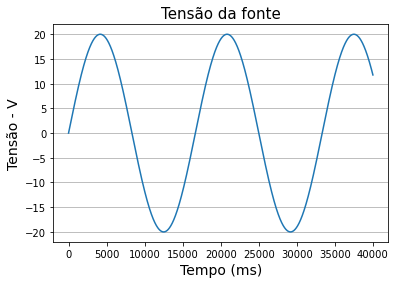

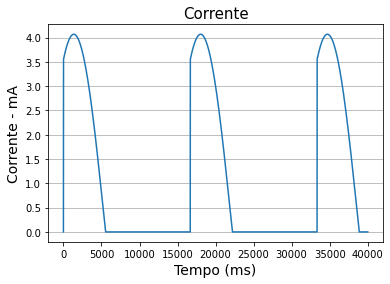

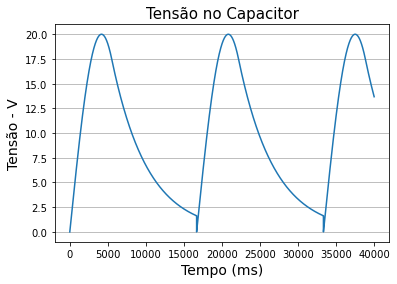

In [207]:

plt.title("Tensão da fonte",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_RL['t - s'],df_RL['Tensão da Fonte - V'])
plt.show()

plt.title("Corrente",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Corrente - mA", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_RL['t - s'],df_RL['Corrente - mA'])
plt.show()

plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_RL['t - s'],df_RL['Tensão do Capacitor - V'])
plt.show()

## 2.5 - Dados da Simulação

In [16]:
df_psim_RC = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Simulações\RC\circuito 2.csv',
                          sep=',')

display(df_psim_RC)
df_psim_RC.dtypes

,Time,V0,V2
0,0.000025,0.188457,1.884928e-01
1,0.000050,0.376933,3.769688e-01
2,0.000075,0.565375,5.654113e-01
3,0.000100,0.753767,7.538037e-01
4,0.000125,0.942093,9.421290e-01
...,...,...,...
3995,0.099900,1.663877,-7.538037e-01
3996,0.099925,1.655050,-5.654113e-01
3997,0.099950,1.646270,-3.769688e-01
3998,0.099975,1.637537,-1.884928e-01


Time    float64
V0      float64
V2      float64
dtype: object

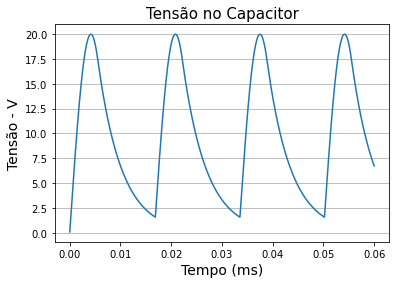

In [9]:
plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_psim_RC["Time"],df_psim_RC["V0"])


plt.show()

## 2.6 - Dados do osciloscopio

In [136]:
df_dados_RC = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Dados Osciloscópio\scope_2.CSV',
                          sep=',')
df_dados_RC.columns = df_dados_RC.loc[0]
df_dados_RC=df_dados_RC.drop(0,axis=0)


df_dados_RC["Volt"]=df_dados_RC["Volt"].astype('float')
df_dados_RC["second"]=df_dados_RC["second"].astype('float')

df_dados_RC["second"]=df_dados_RC["second"]+0.036

df_dados_RC.dtypes
display(df_dados_RC)

,second,Volt
1,0.011000,5.672111
2,0.011025,5.672111
3,0.011050,5.672111
4,0.011075,5.672111
5,0.011100,5.672111
...,...,...
1996,0.060875,6.074121
1997,0.060900,6.074121
1998,0.060925,6.074121
1999,0.060950,6.074121


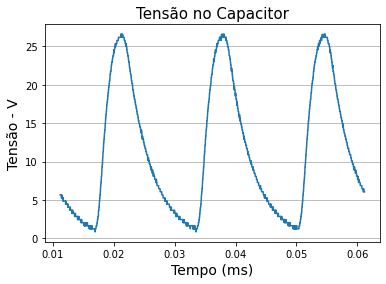

In [134]:
plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_dados_RC["second"],df_dados_RC["Volt"])


plt.show()

## 2.7 - Comparação dos dados do osciloscopio com a simulação

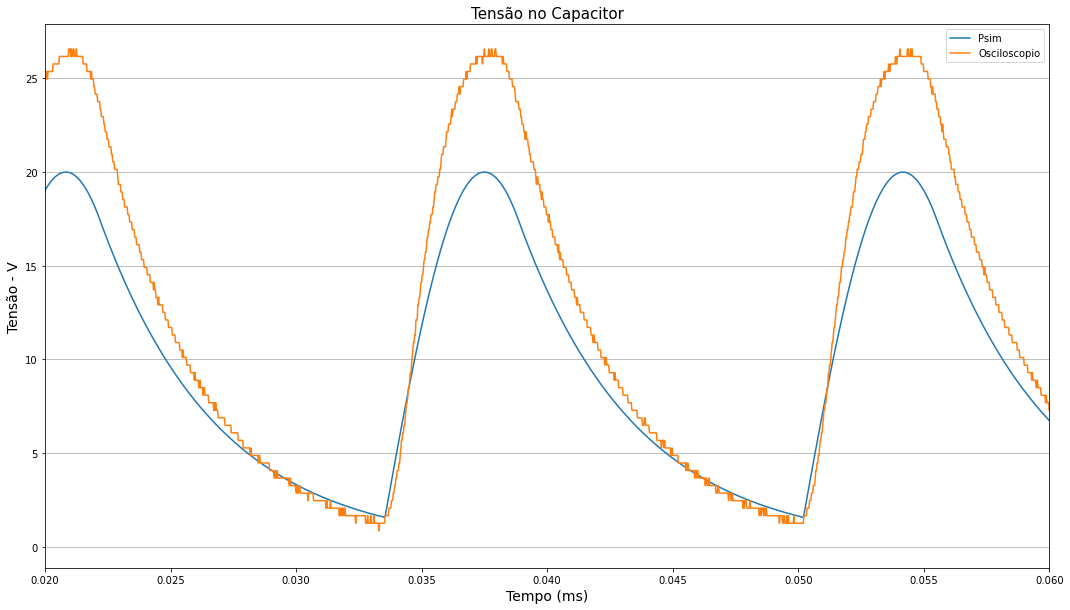

In [137]:
plt.figure(figsize=(18,10))

plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.xlim(0.02,0.06)
plt.grid(axis = "y")
plt.plot(df_psim_RC["Time"],df_psim_RC["V0"],label="Psim")
plt.plot(df_dados_RC["second"],df_dados_RC["Volt"],label="Osciloscopio")
plt.legend()

plt.savefig('Circuito 2 - Grafico comparativo.png', format='png')

plt.show()

# 3 - Cicuito RLC

## 3.1 - Préambulo
    Variaveis criadas para determinando todos os valores de componentes prédeterminados

In [5]:
C = 470*10**(-6) #Capacitancia
L = 0.0054 #Indutancia
R = 10 #Resistencia
n = 40000
Ts = 10**-6 #Tempo de amostragem
w = 2*m.pi * 60

Vp=20



## 3.2 - Funções
    Funções referentes as entradas e saidas do circuito

In [22]:

def Vs(k):
    Vs=Vp* m.sin(w*k*Ts)
    return Vs



def Vc(k):
    if k==0:
        Vc=0
    elif k>0:
        Vc=(val_Vs[k]+((L/Ts)*val_il[k-1])+(val_Vc[k-1]*(L*C/(Ts**2))))/((L*C/(Ts**2))+(1/R)+1)
        #Vc=(val_il[k-1]+(Ts*val_Vs[k]/L)+(C*val_Vc[k-1]/Ts))/((C/Ts)+(1/R)+(Ts/L))
    return Vc




def il(k):
    if k==0:
        il=0
    elif k>0:          
        il=(C/Ts)*(val_Vc[k]-val_Vc[k-1])+(val_Vc[k]/R)
        #il=(Ts*(val_Vs[k]-val_Vc[k])/float(L))+val_il[k-1]
    return il

def Vl(k):
    if val_i[k]>0:
        Vl=(L/Ts)*(val_il[k]-val_il[k-1])
    else:
        Vl=0    
    return Vl



## 3.3 - Armazenando valores

In [19]:
val_Vs=[]
val_Vc=[]
val_il=[]
val_i=[]

for k in range(0,n):
    val_Vs.append(Vs(k))
    val_Vc.append(Vc(k))
    val_il.append(il(k))
    #val_i.append(i(k))
   
    

## 3.4 - Graficos

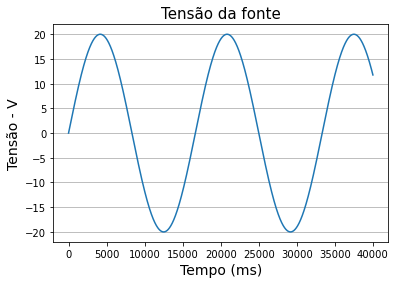

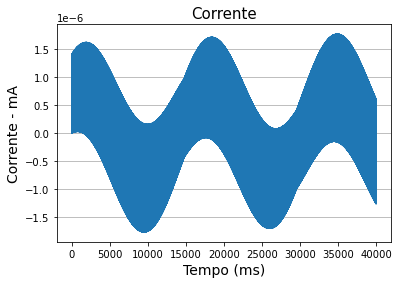

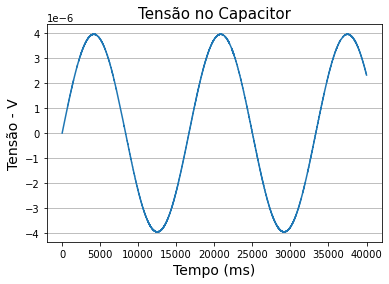

In [21]:

plt.title("Tensão da fonte",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(val_Vs)
plt.show()

plt.title("Corrente",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Corrente - mA", fontsize=14)
plt.grid(axis = "y")
plt.plot(val_il)
plt.show()

plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
#plt.ylim(0,60)
plt.plot(val_Vc)
plt.show()



## 3.5 - Dados da Simulação

In [65]:
df_psim_RLC = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Simulações\RLC\circuito 3.csv',
                          sep=',')

display(df_psim_RLC)
df_psim_RLC.dtypes

,Time,V0,V2,Vl
0,0.000025,0.000023,1.884928e-01,0.188470
1,0.000050,0.000115,3.769688e-01,0.376853
2,0.000075,0.000288,5.654113e-01,0.565123
3,0.000100,0.000599,7.538037e-01,0.753204
4,0.000125,0.001093,9.421290e-01,0.941036
...,...,...,...,...
3995,0.099900,3.511064,-7.538037e-01,0.000288
3996,0.099925,3.492438,-5.654113e-01,-0.000463
3997,0.099950,3.473910,-3.769688e-01,0.000297
3998,0.099975,3.455481,-1.884928e-01,-0.000454


Time    float64
V0      float64
V2      float64
Vl      float64
dtype: object

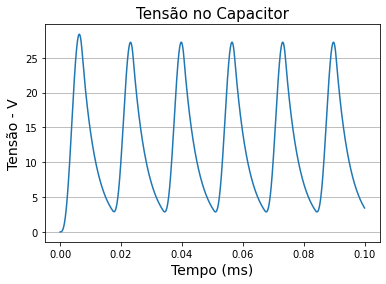

In [66]:
plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_psim_RLC["Time"],df_psim_RLC["V0"])


plt.show()

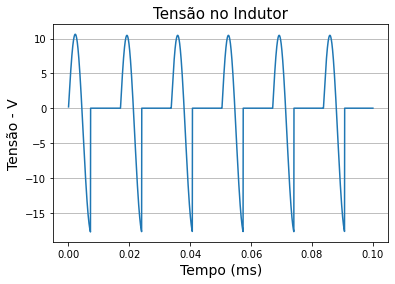

In [68]:
plt.title("Tensão no Indutor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_psim_RLC["Time"],df_psim_RLC["Vl"])


plt.show()

## 3.6 - Dados do osciloscopio

In [122]:
df_dadosRLC_C = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Dados Osciloscópio\scope_6.CSV',sep=',')
df_dadosRLC_C.columns = df_dadosRLC_C.loc[0]
df_dadosRLC_C=df_dadosRLC_C.drop(0,axis=0)


df_dadosRLC_C["Volt"]=df_dadosRLC_C["Volt"].astype('float')
df_dadosRLC_C["second"]=df_dadosRLC_C["second"].astype('float')
df_dadosRLC_C["second"]=df_dadosRLC_C["second"]+0.0387

df_dadosRLC_C.dtypes

display(df_dadosRLC_C)

,second,Volt
1,0.013700,4.06407
2,0.013725,4.06407
3,0.013750,4.06407
4,0.013775,4.06407
5,0.013800,4.06407
...,...,...
1996,0.063575,4.46608
1997,0.063600,4.46608
1998,0.063625,4.06407
1999,0.063650,4.06407


In [115]:
df_dadosRLC_L = pd.read_csv(r'C:\Users\victo\OneDrive\Meus Bagulhos\Arquivos\UERJ\2022.1\Eletronica Industrial\Lab\Lab 1\Dados Osciloscópio\scope_3.CSV',sep=',')
df_dadosRLC_L.columns = df_dadosRLC_L.loc[0]
df_dadosRLC_L=df_dadosRLC_L.drop(0,axis=0)


df_dadosRLC_L["Volt"]=df_dadosRLC_L["Volt"].astype('float')
df_dadosRLC_L["second"]=df_dadosRLC_L["second"].astype('float')
df_dadosRLC_L["second"]=df_dadosRLC_L["second"]+0.04065


df_dadosRLC_L.dtypes
display(df_dadosRLC_L)

,second,Volt
1,0.015650,-0.35804
2,0.015675,-0.35804
3,0.015700,-0.35804
4,0.015725,-0.35804
5,0.015750,-0.35804
...,...,...
1996,0.065525,-0.35804
1997,0.065550,-0.35804
1998,0.065575,-0.35804
1999,0.065600,-0.35804


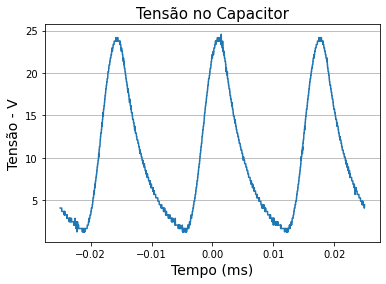

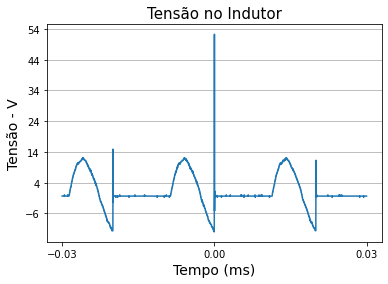

In [74]:
plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.plot(df_dadosRLC_C["second"],df_dadosRLC_C["Volt"])
#plt.xlim(0,600)

plt.show()

plt.title("Tensão no Indutor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.grid(axis = "y")
plt.yticks(np.arange(-26, +200, step=10))
plt.xticks(np.arange(-25E-3,+24.97500E-0,step=0.025))
plt.plot(df_dadosRLC_L["second"],df_dadosRLC_L["Volt"])
#plt.xlim(0,600)

plt.show()

## 3.7 - Comparação dos dados do osciloscopio com a simulação

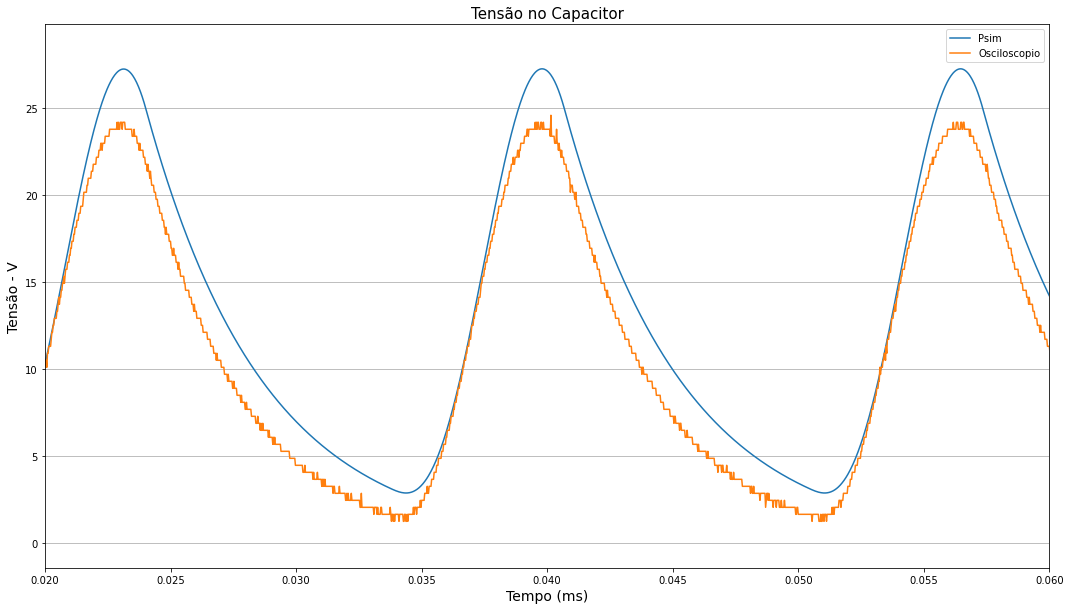

In [124]:
plt.figure(figsize=(18,10))

plt.title("Tensão no Capacitor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.xlim(0.02,0.06)
plt.grid(axis = "y")
plt.plot(df_psim_RLC["Time"],df_psim_RLC["V0"],label="Psim")
plt.plot(df_dadosRLC_C["second"],df_dadosRLC_C["Volt"],label="Osciloscopio")
plt.legend()

plt.savefig('Circuito 3 - Grafico comparativo C.png', format='png')

plt.show()

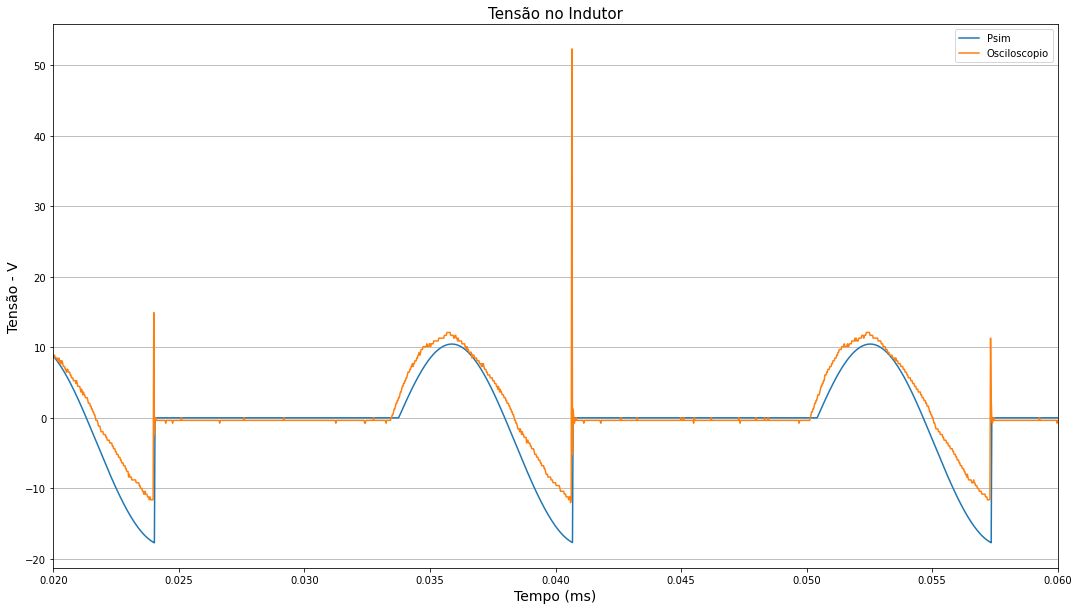

In [119]:
plt.figure(figsize=(18,10))

plt.title("Tensão no Indutor",fontsize=15)
plt.xlabel("Tempo (ms)", fontsize=14)
plt.ylabel("Tensão - V", fontsize=14)
plt.xlim(0.02,0.06)
plt.grid(axis = "y")
plt.plot(df_psim_RLC["Time"],df_psim_RLC["Vl"],label="Psim")
plt.plot(df_dadosRLC_L["second"],df_dadosRLC_L["Volt"],label="Osciloscopio")
plt.legend()

plt.savefig('Circuito 3 - Grafico comparativo L.png', format='png')

plt.show()